# Working with personal data requests


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



## Part 0: Setting up a GitHub repository
#### Link: https://github.com/audreymarthin/Proj8_CS215_Audrey_Ruth

## Part 1: Extracting timestamps from your personal data

In [162]:
# Read CSV
audrey = pd.read_csv("audrey_timestamps.csv")

# Convert to datetime and sort
audrey["endTime"] = pd.to_datetime(audrey["endTime"])
audrey.sort_values(by="endTime")

# Examine
audrey

,Unnamed: 0,endTime
0,0,2022-10-18 01:12:00
1,1,2022-10-18 01:15:00
2,2,2022-10-18 01:19:00
3,3,2022-10-18 01:23:00
4,4,2022-10-18 16:58:00
...,...,...
19954,19954,2023-10-18 19:42:00
19955,19955,2023-10-18 19:42:00
19956,19956,2023-10-18 19:45:00
19957,19957,2023-10-18 19:48:00


In [163]:
# Convert to csv
audrey["endTime"].to_csv("audrey_timestamps.csv")

## Part 2: Analyzing timestamp data for patterns

In [165]:
# Read CSV
ruth = pd.read_csv("Ruth_timestamps.csv")

# Convert to datetime and sort
ruth["ts"] = pd.to_datetime(ruth["ts"])
ruth.sort_values(by="ts")

# Examine
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [167]:
# Format the datetime without the timezone offset
ruth["ts"] = pd.to_datetime(ruth["ts"].dt.strftime("%Y-%m-%d %H:%M:%S")) # the original data had a different ts format
ruth["ts"].to_csv("Ruth_timestamps.csv")
ruth

,Unnamed: 0,ts
0,0,2023-06-19 02:58:03
1,1,2023-06-19 03:03:32
2,2,2023-06-19 03:10:21
3,3,2023-06-19 03:47:41
4,4,2023-06-19 03:54:56
...,...,...
12518,12518,2023-10-26 23:45:12
12519,12519,2023-10-26 23:47:49
12520,12520,2023-10-26 23:48:28
12521,12521,2023-10-26 23:49:15


In [168]:
# Look at time difference
ruth["timeDifference"] = ruth["ts"].diff()
ruth

,Unnamed: 0,ts,timeDifference
0,0,2023-06-19 02:58:03,NaT
1,1,2023-06-19 03:03:32,0 days 00:05:29
2,2,2023-06-19 03:10:21,0 days 00:06:49
3,3,2023-06-19 03:47:41,0 days 00:37:20
4,4,2023-06-19 03:54:56,0 days 00:07:15
...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37
12520,12520,2023-10-26 23:48:28,0 days 00:00:39
12521,12521,2023-10-26 23:49:15,0 days 00:00:47


#### I. What is the longest time between timestamps? What is the average time between timestamps?

In [169]:
# Utilize max and mean

r_longest = ruth["timeDifference"].max()
r_mean = ruth["timeDifference"].mean()
print("The longest time between timestamps for Ruth is {} and the average time between timestamps is {}".format(r_longest, r_mean))

The longest time between timestamps for Ruth is 2 days 18:20:10 and the average time between timestamps is 0 days 00:14:56.076744928


#### II. What is the day with the most timestamps? How many events (timestamps) were on that day? 

In [170]:
# Have date column
ruth["date"] = pd.DatetimeIndex(ruth["ts"]).date 
ruth


,Unnamed: 0,ts,timeDifference,date
0,0,2023-06-19 02:58:03,NaT,2023-06-19
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19
...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26


In [178]:
# Count the occurrences of each date and examine
r_date_counts = ruth["date"].value_counts()
r_date_counts


date
2023-09-06    730
2023-08-03    416
2023-08-02    386
2023-09-08    362
2023-10-19    316
             ... 
2023-07-30      7
2023-06-21      4
2023-08-25      3
2023-10-08      2
2023-07-03      2
Name: count, Length: 125, dtype: int64

In [179]:
# Now create column for ts count
# Group by 'date' and count occurrences of 'ts' per date
ruth["ts_count_per_date"] = ruth.groupby("date")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6
...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10


In [174]:
# Get the date with the most timestamps and the corresponding count
r_most_ts_date = ruth["ts_count_per_date"].idxmax()
r_date_ts_count = ruth["ts_count_per_date"].max()
most_ts_date = ruth.loc[r_most_ts_date, "date"]
print("The day with the most timestamps for Ruth's data is {} with {} events (timestamps) on this day.".format(most_ts_date, r_date_ts_count))

The day with the most timestamps for Ruth's data is 2023-09-06 with 730 events (timestamps) on this day.


#### III. What is the month with the most timestamps? How many events (timestamps) were on that month?

In [175]:
# Have month column
ruth["month"] = pd.DatetimeIndex(ruth["ts"]).month
ruth 

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6
...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10


In [181]:
# Count the occurrences of each month and examine
r_month_counts = ruth["month"].value_counts()
r_month_counts


month
9     4218
10    2852
8     2683
7     2322
6      448
Name: count, dtype: int64

In [182]:
# Now create column for ts count
# Group by 'month' and count occurrences of 'ts'
ruth["ts_count_per_month"] = ruth.groupby("month")["ts"].transform("count")
ruth

,Unnamed: 0,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448
1,1,2023-06-19 03:03:32,0 days 00:05:29,2023-06-19,15,6,448
2,2,2023-06-19 03:10:21,0 days 00:06:49,2023-06-19,15,6,448
3,3,2023-06-19 03:47:41,0 days 00:37:20,2023-06-19,15,6,448
4,4,2023-06-19 03:54:56,0 days 00:07:15,2023-06-19,15,6,448
...,...,...,...,...,...,...,...
12518,12518,2023-10-26 23:45:12,0 days 00:01:26,2023-10-26,37,10,2852
12519,12519,2023-10-26 23:47:49,0 days 00:02:37,2023-10-26,37,10,2852
12520,12520,2023-10-26 23:48:28,0 days 00:00:39,2023-10-26,37,10,2852
12521,12521,2023-10-26 23:49:15,0 days 00:00:47,2023-10-26,37,10,2852


In [183]:
# Get the month with the most timestamps and the corresponding count
r_most_ts_month = ruth["ts_count_per_month"].idxmax()
r_month_ts_count = ruth["ts_count_per_month"].max()
most_ts_month = ruth.loc[r_most_ts_month, "month"]
print("The month with the most timestamps for Ruth's data is {} with {} events (timestamps) on this month.".format(most_ts_month, r_month_ts_count))

The month with the most timestamps for Ruth's data is 9 with 4218 events (timestamps) on this month.


#### IV. Data Visualization

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


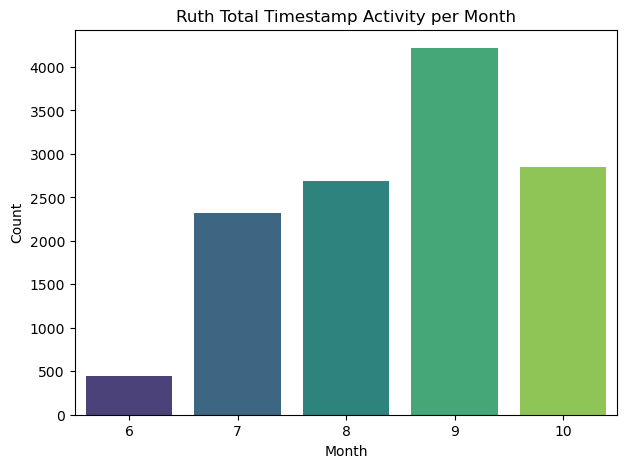

In [195]:
# Visualize ts activity trend per month
plt.figure(figsize=(7, 5))
sns.barplot(x="month", y="ts_count_per_month", data=ruth, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

We can see that in month 9 there is peak timestamp activity whereas month 6 had the lowest data. However, it's important to note that Ruth's data started on 2023-06-19, which is in the middle of month 6 which explains the lack of data compared to the other months.

In [199]:
# Extract the day of the week from the timestamp
ruth["day_of_week"] = ruth["ts"].dt.day_name()

# Count the number of events for each day of the week
r_day_counts = ruth["day_of_week"].value_counts()

# Order the days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
r_day_counts = r_day_counts.reindex(days_order)
r_day_counts


day_of_week
Monday       1270
Tuesday      2089
Wednesday    2393
Thursday     2288
Friday       1689
Saturday     1833
Sunday        961
Name: count, dtype: int64

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


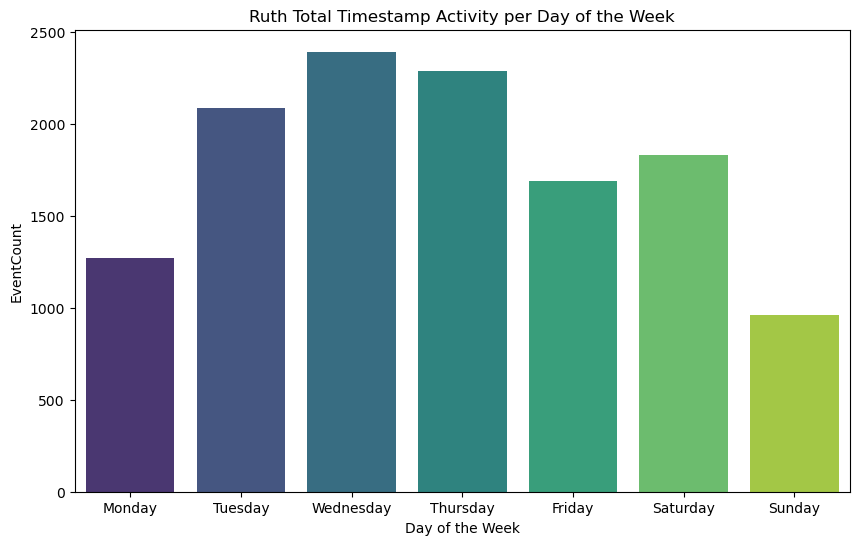

In [200]:
# Visualize ts activity trend per day of week
plt.figure(figsize=(10, 6))
sns.barplot(x=r_day_counts.index, y=r_day_counts.values, palette="viridis")
plt.title("Ruth Total Timestamp Activity per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("EventCount")
plt.show()

We can observe Ruth has the most timestamp data taken on Wednesday, whereas Sunday has the least timestamp data. So it can be inferred that peak timestamp activity happens during the middle of the week.

In [217]:
# Extract the hour from the timestamp
ruth["hour"] = ruth["ts"].dt.hour

# Create column for ts count
# Group by 'hour' and count occurrences of 'ts'
ruth["ts_count_per_hour"] = ruth.groupby(["date", "hour"])["ts"].transform("count")

# Calculate the mean ts_count_per_hour for each unique hour
hourly_mean = ruth.groupby("hour")["ts_count_per_hour"].mean().reset_index()
hourly_mean


,hour,ts_count_per_hour
0,0,54.438975
1,1,40.133612
2,2,25.070404
3,3,55.812983
4,4,88.324786
5,5,77.103718
6,6,49.430859
7,7,45.863436
8,8,24.435897
9,9,30.136364


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

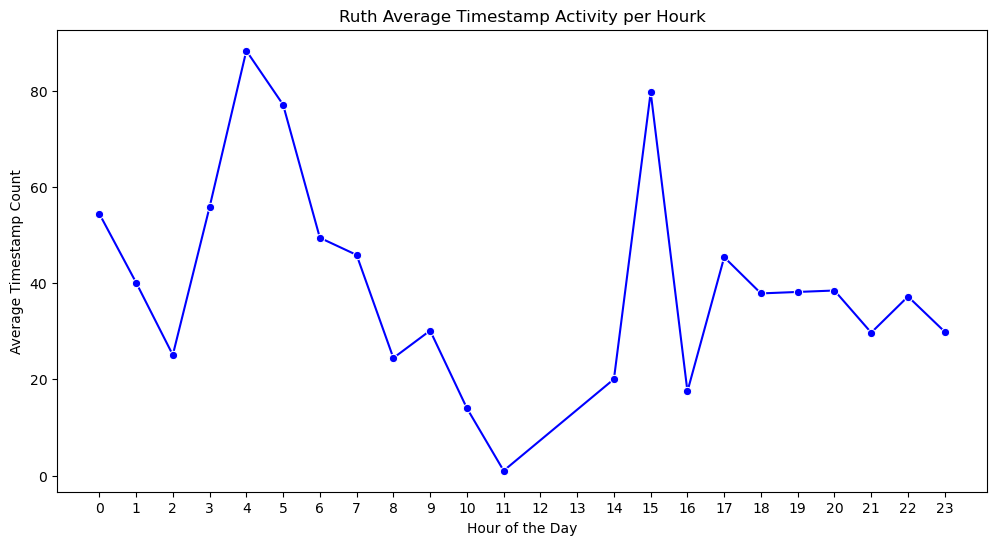

In [218]:
# Visualize ts average activity trend per hour
plt.figure(figsize=(12, 6))
sns.lineplot(x="hour", y="ts_count_per_hour", data=hourly_mean, marker='o', color='b')
plt.title("Ruth Average Timestamp Activity per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Timestamp Count")
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

We can observe that Ruth has an average peak timestamp activity at 4 am in the morning with the second highest at 3 pm in the afternoon. It seems that 11 am is the least timestamp activity. There seems to be an unexpected timestamp activity happening at a very different hour of the day.

#### V. What is the source of this data? 
Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

For the days and months that your partner identified as having the most timestamps in your data, try to figure out what was happening on those days. What other data might help you figure this out?

In [16]:
# Taken from Ruth's code but changed variable name and edited slightly

audrey = pd.read_csv("audrey_timestamps.csv")
audrey["endTime"] = pd.to_datetime(audrey["endTime"])
audrey.sort_values(by="endTime")

,Unnamed: 0,endTime
0,0,2022-10-18 01:12:00
1,1,2022-10-18 01:15:00
2,2,2022-10-18 01:19:00
3,3,2022-10-18 01:23:00
4,4,2022-10-18 16:58:00
...,...,...
19954,19954,2023-10-18 19:42:00
19955,19955,2023-10-18 19:42:00
19956,19956,2023-10-18 19:45:00
19957,19957,2023-10-18 19:48:00


In [17]:
audrey['end_diff'] = audrey['endTime'].diff()
audrey

,Unnamed: 0,endTime,end_diff
0,0,2022-10-18 01:12:00,NaT
1,1,2022-10-18 01:15:00,0 days 00:03:00
2,2,2022-10-18 01:19:00,0 days 00:04:00
3,3,2022-10-18 01:23:00,0 days 00:04:00
4,4,2022-10-18 16:58:00,0 days 15:35:00
...,...,...,...
19954,19954,2023-10-18 19:42:00,0 days 00:02:00
19955,19955,2023-10-18 19:42:00,0 days 00:00:00
19956,19956,2023-10-18 19:45:00,0 days 00:03:00
19957,19957,2023-10-18 19:48:00,0 days 00:03:00


In [18]:
audrey['end_diff'].max() #longest time between timestamps

Timedelta('11 days 04:15:00')

In [19]:
audrey['end_diff'].mean() #average time between timestamps

Timedelta('0 days 00:26:23.485319170')

For Audrey, the longest time between timestamps is 11 days and the average between two timestamps is 26 minutes 23 seconds 

In [20]:
audrey["date"]=pd.DatetimeIndex(audrey["endTime"]).date
audrey["date"].value_counts()

date
2023-04-19    406
2023-02-18    343
2023-09-02    323
2023-05-12    264
2023-01-22    226
             ... 
2022-11-24      1
2023-08-10      1
2023-10-03      1
2022-11-18      1
2023-08-21      1
Name: count, Length: 300, dtype: int64

In [21]:
#checking the frequency of the time spent on the app through the dates
audrey['date']=audrey['endTime'].dt.date
audrey['month_year'] = pd.to_datetime(audrey['date']).dt.strftime('%m-%Y')
audrey['frequency_month'] = audrey['month_year'].map(audrey['month_year'].value_counts())
audrey['frequency_date'] = audrey['date'].map(audrey['date'].value_counts())
audrey['frequency_date'].max()
audrey

,Unnamed: 0,endTime,end_diff,date,month_year,frequency_month,frequency_date
0,0,2022-10-18 01:12:00,NaT,2022-10-18,10-2022,588,80
1,1,2022-10-18 01:15:00,0 days 00:03:00,2022-10-18,10-2022,588,80
2,2,2022-10-18 01:19:00,0 days 00:04:00,2022-10-18,10-2022,588,80
3,3,2022-10-18 01:23:00,0 days 00:04:00,2022-10-18,10-2022,588,80
4,4,2022-10-18 16:58:00,0 days 15:35:00,2022-10-18,10-2022,588,80
...,...,...,...,...,...,...,...
19954,19954,2023-10-18 19:42:00,0 days 00:02:00,2023-10-18,10-2023,1567,70
19955,19955,2023-10-18 19:42:00,0 days 00:00:00,2023-10-18,10-2023,1567,70
19956,19956,2023-10-18 19:45:00,0 days 00:03:00,2023-10-18,10-2023,1567,70
19957,19957,2023-10-18 19:48:00,0 days 00:03:00,2023-10-18,10-2023,1567,70


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Audrey's Spotify TimeStamp Data")

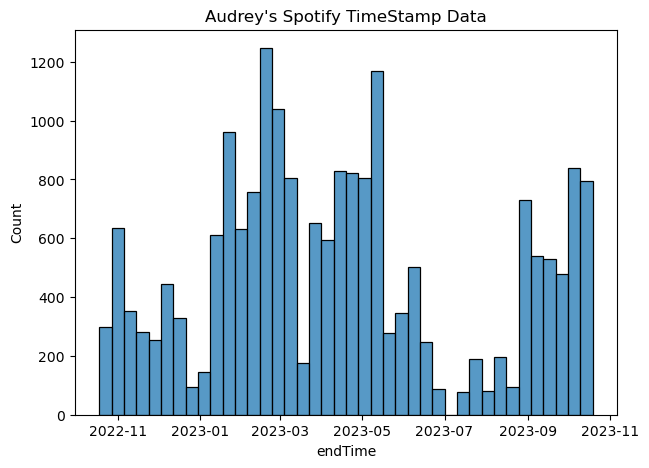

In [22]:
plt.figure(figsize=(7, 5))
sns.histplot(data=audrey["endTime"])
plt.title("Audrey's Spotify TimeStamp Data")

/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

Text(0.5, 1.0, "Audrey's Spotify TimeStamp Data")

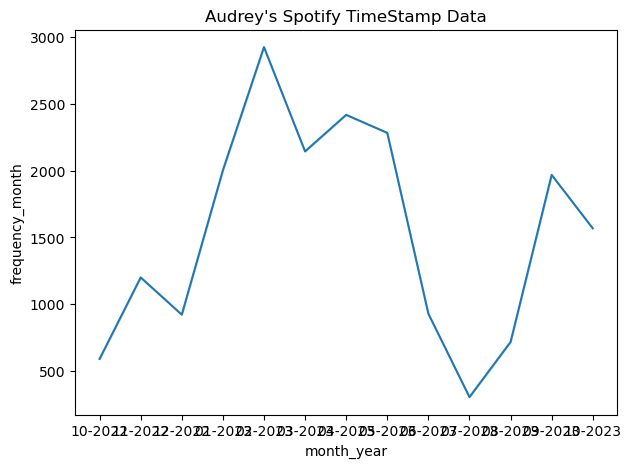

In [23]:
plt.figure(figsize=(7, 5))
sns.lineplot(x="month_year", y="frequency_month", data=audrey)
plt.title("Audrey's Spotify TimeStamp Data")

## Part 3: Make a combined visualization

First, discuss your results together -- what did you learn about yourself and your partner through doing this?

_Learn about Partner_
Audrey: I learned that Ruth really loves listening to music and she seems to always have music running! Turns out, Ruth gets very distracted but because the song rhythm it helps Ruth follow what her brain is thinking when working. So, I found that we have this in common that we focus more with music on.

Ruth: Audrey was on a trip for 11 days which explains the 11 day longest time without timestamp. I also learned that Audrey likes music maybe not as much as me but we definitely love Spotify.


_Learn about Yourself_
Audrey: I learned about myself that I listen to a lot of songs, but it paled in comparison to Ruth's data. Turns out, i'm still in a more normal level of listening to music.

Ruth: I learned that I should not lose my airpods because I listen to music so much.

Then, using both partners' timestamp data, create at least one visualization that shows the distribution of events over time for both people (on the same visualization). Note: To do this, you may need to do some data analysis or aggregation (for example, determining the number of data points collected each hour/day/week/month/year, etc.).

For this part, use Python and Jupyter notebook, plus matplotlib/pyplot or Seaborn.

What do you notice by looking at both partners' data together that you didn't notice looking at the on their own?

In [35]:
# Perform an inner merge on the 'date' column
df_audrey_ruth = pd.merge(ruth, audrey, on='date', how='inner')
df_audrey_ruth

,Unnamed: 0_x,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month,Unnamed: 0_y,endTime,end_diff,month_year,frequency_month,frequency_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,15219,2023-06-19 04:22:00,0 days 10:49:00,06-2023,927,70
1,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,15220,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
2,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,15221,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
3,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,15222,2023-06-19 04:23:00,0 days 00:01:00,06-2023,927,70
4,0,2023-06-19 02:58:03,NaT,2023-06-19,15,6,448,15223,2023-06-19 04:23:00,0 days 00:00:00,06-2023,927,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,19954,2023-10-18 19:42:00,0 days 00:02:00,10-2023,1567,70
449562,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,19955,2023-10-18 19:42:00,0 days 00:00:00,10-2023,1567,70
449563,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,19956,2023-10-18 19:45:00,0 days 00:03:00,10-2023,1567,70
449564,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10,2852,19957,2023-10-18 19:48:00,0 days 00:03:00,10-2023,1567,70


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

Text(0.5, 1.0, 'Audrey and Ruth Spotify TimeStamp Distribution per Date')

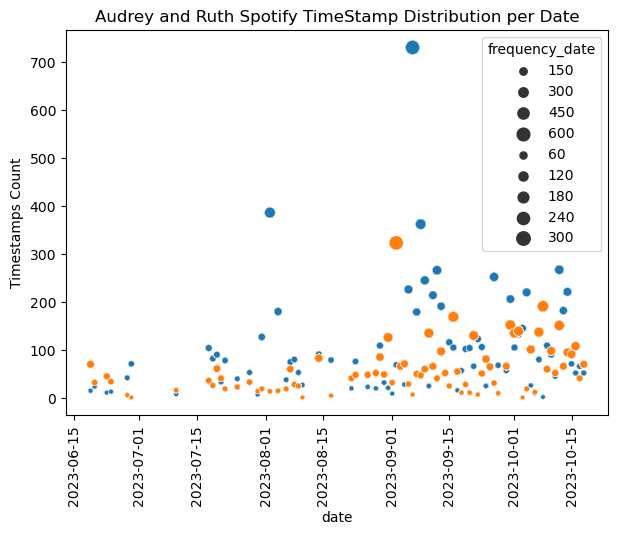

In [25]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x="date", y="ts_count_per_date", data=df_audrey_ruth, size="ts_count_per_date", sizes=(10, 100), alpha=0.5)
sns.scatterplot(x="date", y="frequency_date", data=df_audrey_ruth, size="frequency_date", sizes=(10, 100), alpha=0.5)
plt.xticks(rotation="vertical")
plt.ylabel("Timestamps Count")
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Date")

In [26]:
df_audrey_ruth['month'] = pd.to_datetime(df_audrey_ruth['date']).dt.strftime('%m-%Y')
df_audrey_ruth

,Unnamed: 0_x,ts,timeDifference,date,ts_count_per_date,month,ts_count_per_month,Unnamed: 0_y,endTime,end_diff,month_year,frequency_month,frequency_date
0,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,15219,2023-06-19 04:22:00,0 days 10:49:00,06-2023,927,70
1,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,15220,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
2,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,15221,2023-06-19 04:22:00,0 days 00:00:00,06-2023,927,70
3,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,15222,2023-06-19 04:23:00,0 days 00:01:00,06-2023,927,70
4,0,2023-06-19 02:58:03,NaT,2023-06-19,15,06-2023,448,15223,2023-06-19 04:23:00,0 days 00:00:00,06-2023,927,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,19954,2023-10-18 19:42:00,0 days 00:02:00,10-2023,1567,70
449562,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,19955,2023-10-18 19:42:00,0 days 00:00:00,10-2023,1567,70
449563,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,19956,2023-10-18 19:45:00,0 days 00:03:00,10-2023,1567,70
449564,11546,2023-10-18 20:03:22,0 days 00:01:32,2023-10-18,52,10-2023,2852,19957,2023-10-18 19:48:00,0 days 00:03:00,10-2023,1567,70


/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/audreymarthin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

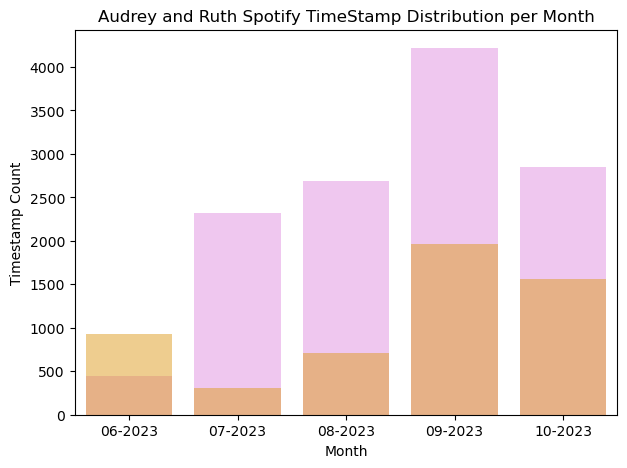

In [70]:
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='ts_count_per_month', data=df_audrey_ruth, color='violet', alpha=0.5)
sns.barplot(x='month_year', y='frequency_month', data=df_audrey_ruth, color='orange', alpha=0.5)
plt.title("Audrey and Ruth Spotify TimeStamp Distribution per Month")
plt.xlabel('Month')
plt.ylabel('Timestamp Count')
plt.show()